In [1]:
# exit()

In [2]:
from os import path
path.exists(r"C:\Users\mwill\Downloads\DSA\DATA.csv")

True

# Library and CSV

***library***

In [3]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas==2.2.3 in c:\users\mwill\appdata\local\programs\python\python311\lib\site-packages (from -r requirements.txt (line 1)) (2.2.3)




[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


***import library***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, mean_squared_error, r2_score
from pathlib import Path
from scipy.stats import chi2_contingency

***variable for saving output***

In [5]:
output_folder = r"C:\Users\mwill\Downloads\DSA\output"

# CSV and column

***reading CSV and cut column***

In [6]:
mp1 = pd.read_csv(r"C:\Users\mwill\Downloads\DSA\DATA.csv")
mp1

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,NaN,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,NaN,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


**filtering MonkeyPox == Positive**

In [7]:
positive = mp1[mp1['MonkeyPox']=='Positive']
positive.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
6,P6,Fever,False,True,False,False,False,False,True,False,Positive


***cut "Systemic Illness" and "Patient_ID" column***

In [8]:
mp2 = mp1.drop('Systemic Illness', axis=1)
mp3 = mp2.drop('Patient_ID', axis=1)
mp3

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,False,True,True,True,False,True,False,False,Negative
1,True,False,True,True,False,False,True,False,Positive
2,False,True,True,False,False,False,True,False,Positive
3,True,False,False,False,True,True,True,False,Positive
4,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...
24995,True,True,False,True,True,False,False,True,Positive
24996,False,True,True,False,True,True,True,True,Positive
24997,True,True,False,False,True,True,False,False,Positive
24998,False,True,False,True,True,True,False,False,Negative


***show 1000 data***

In [9]:
mp4 = mp3.head(1000)

# Graph

**Pie chart for Systemic Illness**

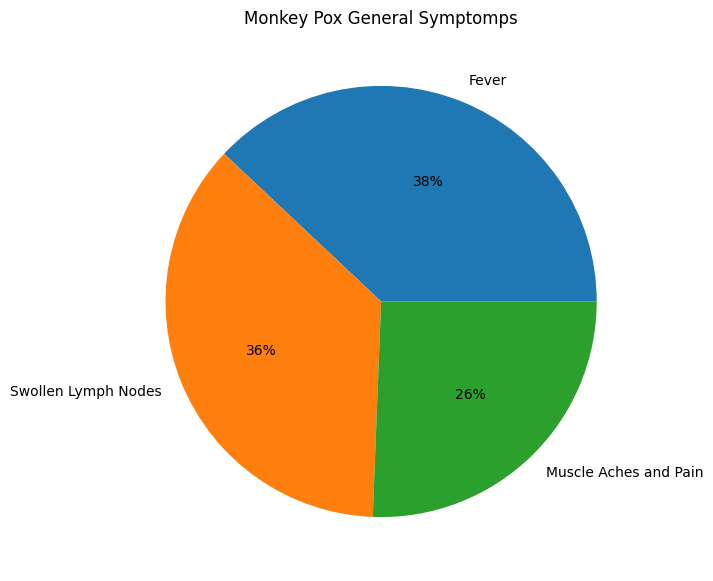

In [10]:
fig = plt.figure(figsize=(14, 7))
plt.pie(x=positive['Systemic Illness'].value_counts(),labels = positive['Systemic Illness'].value_counts().index,autopct='%.0f%%')
plt.title('Monkey Pox General Symptomps')
plt.show()

**Bar chart for every column with filter "Positive"**

In [11]:
for column in mp3.columns:
    # Count the occurrences of True and False values
    value_counts = mp3[column].value_counts()

    # Create the bar plot
    fig = go.Figure(data=[go.Bar(
        x=value_counts.index,
        y=value_counts.values,
        marker_color=['green' if val == True else 'red' for val in value_counts.index] # Set color based on True/False
    )])

    # Customize the plot layout
    fig.update_layout(
        title=f'Bar Plot of {column}',
        xaxis_title='Value',
        yaxis_title='Count'
    )

# Chi Square Test

***chi square test -> save to .csv***

In [12]:
results = []
output_file_name = "chi2_result.txt"
os.makedirs(output_folder, exist_ok=True)
output_file_path = os.path.join(output_folder, output_file_name)

for col in ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']:
    observed = pd.crosstab(mp4[col], mp4['MonkeyPox'])
    chi2, p, dof, expected = chi2_contingency(observed)
    output = f"Chi-square test for {col} vs Monkeypox:\n"
    output += f"Chi-square statistic: {chi2:.4f}\n"
    output += f"P-value: {p:.4f}\n"
    if p <= 0.05:
        output += "Rejected\n"
    else:
        output += "Not rejected\n"
        output += "--------------------------\n"
        
    print(output)
    results.append({"Feature": col, "Chi2": chi2, "P-value": p})

    
results_df = pd.DataFrame(results)
results_csv_path = os.path.join(output_folder, "chi2_results.csv")
results_df.to_csv(results_csv_path, index=False)

Chi-square test for Rectal Pain vs Monkeypox:
Chi-square statistic: 10.2154
P-value: 0.0014
Rejected

Chi-square test for Sore Throat vs Monkeypox:
Chi-square statistic: 0.6272
P-value: 0.4284
Not rejected
--------------------------

Chi-square test for Penile Oedema vs Monkeypox:
Chi-square statistic: 0.5700
P-value: 0.4503
Not rejected
--------------------------

Chi-square test for Oral Lesions vs Monkeypox:
Chi-square statistic: 4.0377
P-value: 0.0445
Rejected

Chi-square test for Solitary Lesion vs Monkeypox:
Chi-square statistic: 3.3682
P-value: 0.0665
Not rejected
--------------------------

Chi-square test for Swollen Tonsils vs Monkeypox:
Chi-square statistic: 0.1859
P-value: 0.6664
Not rejected
--------------------------

Chi-square test for HIV Infection vs Monkeypox:
Chi-square statistic: 14.1338
P-value: 0.0002
Rejected

Chi-square test for Sexually Transmitted Infection vs Monkeypox:
Chi-square statistic: 4.2390
P-value: 0.0395
Rejected



***chi square test -> save to .txt***

In [13]:
results = []
output_file_name = "chi2_result.txt"
os.makedirs(output_folder, exist_ok=True)
output_file_path = os.path.join(output_folder, output_file_name)


with open(output_file_path, 'w') as f:
    for col in ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']:
        observed = pd.crosstab(mp4[col], mp4['MonkeyPox'])
        chi2, p, dof, expected = chi2_contingency(observed)
        
        output = f"Chi-square test for {col} vs Monkeypox:\n"
        output += f"Chi-square statistic: {chi2:.4f}\n"
        output += f"P-value: {p:.4f}\n"
        if p <= 0.05:
            output += "Rejected\n"
        else:
            output += "Not rejected\n"
        output += "--------------------------\n"
        
        print(output)

        f.write(output)
        
        results.append({"Feature": col, "Chi2": chi2, "P-value": p})

Chi-square test for Rectal Pain vs Monkeypox:
Chi-square statistic: 10.2154
P-value: 0.0014
Rejected
--------------------------

Chi-square test for Sore Throat vs Monkeypox:
Chi-square statistic: 0.6272
P-value: 0.4284
Not rejected
--------------------------

Chi-square test for Penile Oedema vs Monkeypox:
Chi-square statistic: 0.5700
P-value: 0.4503
Not rejected
--------------------------

Chi-square test for Oral Lesions vs Monkeypox:
Chi-square statistic: 4.0377
P-value: 0.0445
Rejected
--------------------------

Chi-square test for Solitary Lesion vs Monkeypox:
Chi-square statistic: 3.3682
P-value: 0.0665
Not rejected
--------------------------

Chi-square test for Swollen Tonsils vs Monkeypox:
Chi-square statistic: 0.1859
P-value: 0.6664
Not rejected
--------------------------

Chi-square test for HIV Infection vs Monkeypox:
Chi-square statistic: 14.1338
P-value: 0.0002
Rejected
--------------------------

Chi-square test for Sexually Transmitted Infection vs Monkeypox:
Chi-squa

# Model 1: Random Forest

**Model training**

Accuracy: 0.6492
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1754
    Positive       0.65      1.00      0.79      3246

    accuracy                           0.65      5000
   macro avg       0.32      0.50      0.39      5000
weighted avg       0.42      0.65      0.51      5000

           Feature  Importance
1    Penile Oedema    0.385253
0      Sore Throat    0.375958
2  Solitary Lesion    0.180720
3  Swollen Tonsils    0.058069


c:\Users\mwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\mwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\mwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



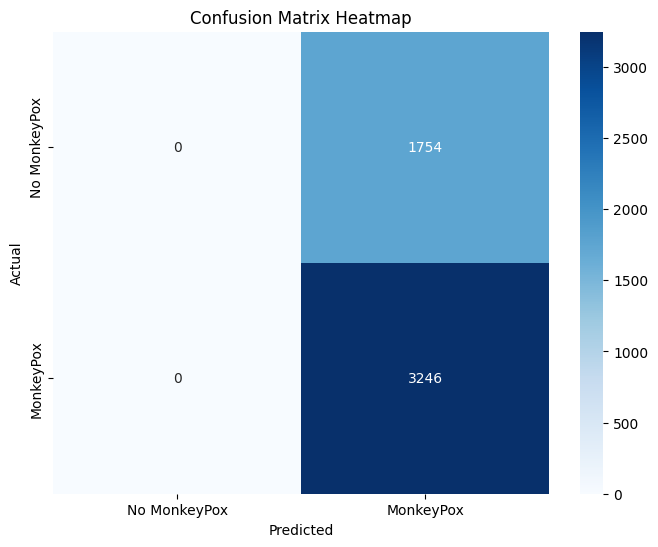

In [14]:
X = mp3[['Sore Throat', 'Penile Oedema', 'Solitary Lesion', 'Swollen Tonsils']]
y = mp3['MonkeyPox']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% training
rf_model = RandomForestClassifier(n_estimators=32, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No MonkeyPox', 'MonkeyPox'], yticklabels=['No MonkeyPox', 'MonkeyPox'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

**Model output using feature importance**

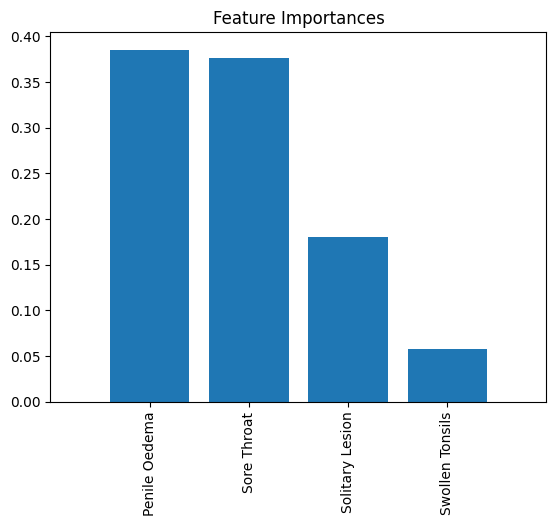

In [15]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

**All model accuracy**

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions with the best model
best_y_pred = best_rf_model.predict(X_test)

# Evaluate the best model's accuracy
best_accuracy = accuracy_score(y_test, best_y_pred)
print("Best Accuracy:", best_accuracy)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\mwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
233 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\mwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.6492


# Model 2: Logistic Regression

**Replacing MonkeyPox value to 1 and 0**

In [17]:
mp3['MonkeyPox'] = mp3['MonkeyPox'].replace({'Positive': 1, 'Negative': 0})
mp3

C:\Users\mwill\AppData\Local\Temp\ipykernel_13064\1266222527.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,False,True,True,True,False,True,False,False,0
1,True,False,True,True,False,False,True,False,1
2,False,True,True,False,False,False,True,False,1
3,True,False,False,False,True,True,True,False,1
4,True,True,True,False,False,True,True,False,1
...,...,...,...,...,...,...,...,...,...
24995,True,True,False,True,True,False,False,True,1
24996,False,True,True,False,True,True,True,True,1
24997,True,True,False,False,True,True,False,False,1
24998,False,True,False,True,True,True,False,False,0


**Model Training**

Accuracy: 0.6754

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.25      0.35      1754
           1       0.69      0.90      0.78      3246

    accuracy                           0.68      5000
   macro avg       0.64      0.58      0.57      5000
weighted avg       0.65      0.68      0.63      5000



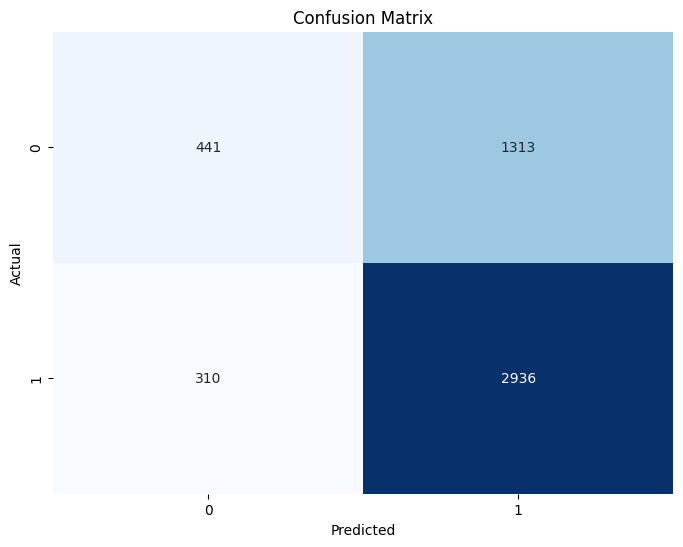

In [18]:
# Prepare the data
X = mp3.drop('MonkeyPox', axis=1)  # Features
y = mp3['MonkeyPox']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate and display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Finding R^2**

In [19]:
# Define features and target
X = mp3[['Sore Throat', 'Penile Oedema', 'Solitary Lesion', 'Swollen Tonsils']]
y = mp3['MonkeyPox']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# If you want to express a form of accuracy, you can use R-squared
accuracy_like_metric = r2 * 100  # Convert to percentage
print(f'R^2 Score (as a percentage): {accuracy_like_metric:.2f}%')

Mean Squared Error: 0.22539574727520675
R^2 Score: 0.010290767150629043
R^2 Score (as a percentage): 1.03%


# Mosaic Plot

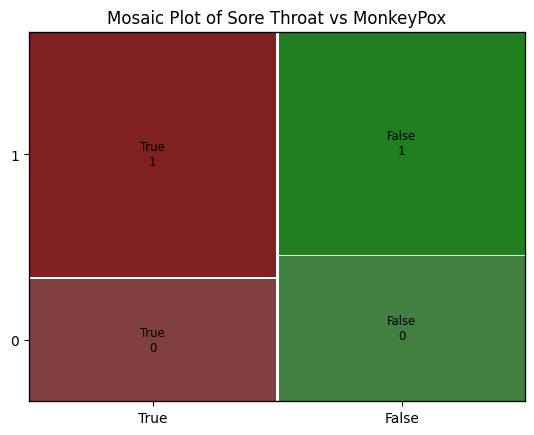

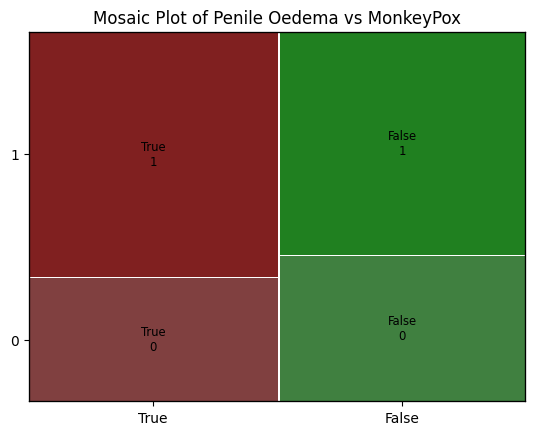

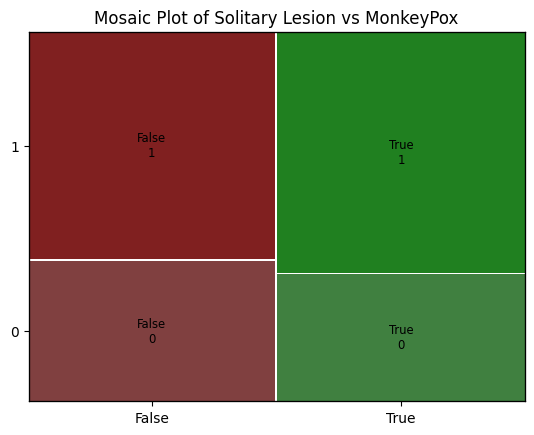

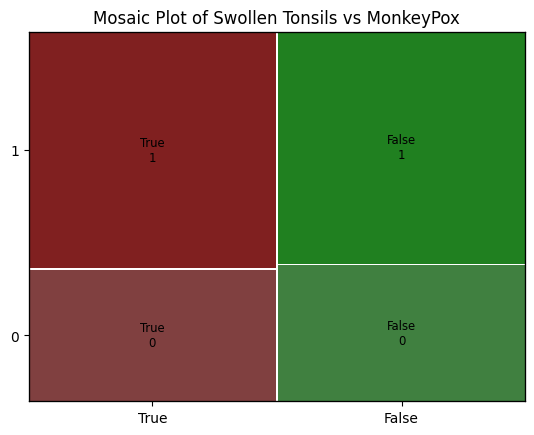

In [20]:
from statsmodels.graphics.mosaicplot import mosaic

import matplotlib.pyplot as plt

# Create a mosaic plot for 'Sore Throat' vs 'MonkeyPox'
mosaic(mp3, ['Sore Throat', 'MonkeyPox'], title='Mosaic Plot of Sore Throat vs MonkeyPox')
mosaic(mp3, ['Penile Oedema', 'MonkeyPox'], title='Mosaic Plot of Penile Oedema vs MonkeyPox')
mosaic(mp3, ['Solitary Lesion', 'MonkeyPox'], title='Mosaic Plot of Solitary Lesion vs MonkeyPox')
mosaic(mp3, ['Swollen Tonsils', 'MonkeyPox'], title='Mosaic Plot of Swollen Tonsils vs MonkeyPox')
plt.show()